                                     Hand Calculation of Gradient Descent Methods

This notebook gives you a basic understanding of Stochastic Gradient Descent and Batch Gradient Descent. 
I have implemented using manual calculation and python scikit learn. 
I have used only 5 samples with 1 independent predcictor to get the solid understanding of gradient descent process.

What is Gradient Descent?

Gradient descent is an optimization algorithm often used for finding the weights or coefficients of machine learning algorithms.

What is Stochastic Gradient Descent?

SGD is a variation of the gradient descent algorithm that calculates the error and updates the model for each example in the
training dataset.

What is Batch Gradient Descent?

Batch gradient descent is a variation of the gradient descent algorithm that calculates the error for each example in the
training dataset, but only updates the model after all training examples have been evaluated.

One cycle through the entire training dataset is called a training epoch.

Therefore it is often said that batch gradient descent performs model updates at the end of each training epoch.

What is Mini-Batch Gradient Descent?

It is an another variation of Gradient Descent Algorithm that splits the training dataset into small batches that are used to 
calculate model error and update model coefficients.


@@Contents@@
1. Implementation of Stochastic Gradient Descent Method
2. Implementation of Batch Gradient Descent Method
3. Implementation of Ordinary Least Square Method 

In [1]:
import os
os.getcwd()
os.chdir('C:/Users/Abin/Desktop/Boosting/Stochastic_Gradient_Boosting')
# import the required package and libraries
import pandas as pd
import matplotlib.pyplot as plt
# Import the fulldata
df=pd.read_excel('data.xlsx',sheet_name='d')

In [14]:
df.head()

,X,Y
0,1,1
1,2,3
2,4,3
3,3,2
4,5,5


                                       1. Implementation of Stochastic Gradient Descent

                                    (i) Manual Calculation to get Coefficient and Intercept

Details;
Initial guess value for Bo(Intercept) and B1 (Coefficient) is 0

Learning rate (V) is constant =0.01

Iteration 1 indicates for 1 sample instance in the dataset

Passes indicates how many iterations we run on the entire dataset (4 pass means 20 Iterations, bcoz we have 5 rows of samples)

In short explanation about the process; Iteration 1
1. Algorithms picks the first sample in the dataset
2. Predict using the function B0+B1(X) [Keep in mind, initial guess for B0,B1 is 0]
3. Calculates the error [B0+B1(x) - Y]
4. Updates Coefficient using B0+1=B0-V(Error) and Intercept using B1+1=B1-V(Error)*X
5. It ends with the 1st iteration and now our updated coefficient is 0.01, intercept is 0.01

Iteration 2;
1. Algorithm picks the second sample in the dataset
2. Now it uses the current B0,B1 values to predict
3. Remaining steps are same as above
Itearation3,4 etc..........

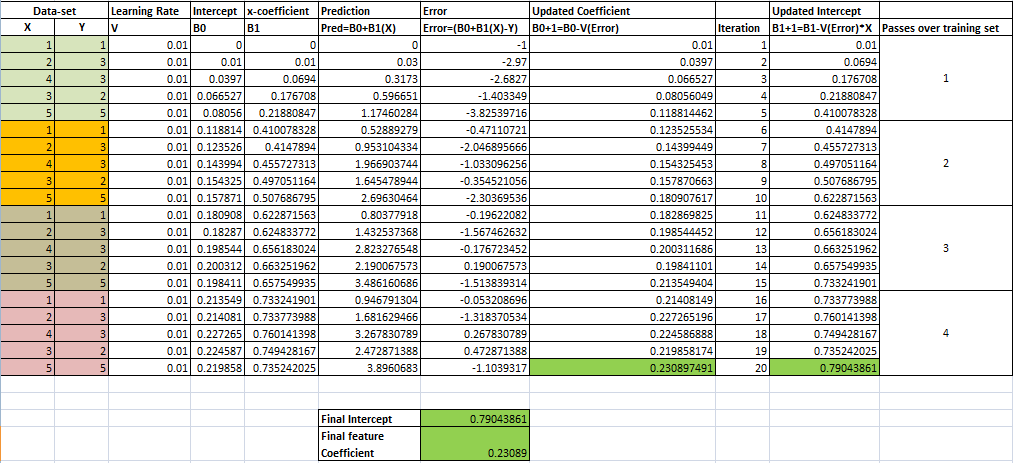

In [43]:
from IPython.display import Image
Image("Manual.png")

                                        (ii) Using Scikit SGDRegressor

In [3]:
train_x=df['X']
train_x

0    1
1    2
2    4
3    3
4    5
Name: X, dtype: int64

                                               To reshape the single feature

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.reshape.html
pandas.Series.reshape
Series.reshape(*args, **kwargs)[source]
Deprecated since version 0.19.0: Calling this method will raise an error. Please call .values.reshape(...) instead.

return an ndarray with the values shape if the specified shape matches exactly the current shape, then return self (for compat)

In [4]:
train_x=train_x.values.reshape(-1,1)
train_x

array([[1],
       [2],
       [4],
       [3],
       [5]], dtype=int64)

In [5]:
train_y=df['Y']
train_y

0    1
1    3
2    3
3    2
4    5
Name: Y, dtype: int64

                                                 Visually get the feel

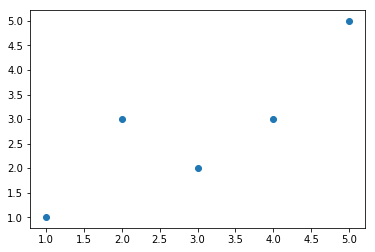

In [40]:
%matplotlib inline
plt.scatter(train_x,train_y)
plt.show()

                                                   Model Building

In [9]:
from sklearn.linear_model import SGDRegressor

In [31]:
model=SGDRegressor(learning_rate='constant',max_iter=4)
model.fit(train_x,train_y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=4, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [32]:
predict=model.predict(train_x)

In [33]:
print(predict)

[1.01502266 1.80976005 3.39923482 2.60449743 4.19397221]


In [34]:
model.coef_

array([0.79473739])

In [35]:
model.intercept_

array([0.22028527])

In [36]:
model.n_iter_

4

                                              Visually Fit the Line

In [47]:
regression_line=[(0.79473739*x)+0.22028527 for x in train_x]
regression_line

[array([1.01502266]),
 array([1.80976005]),
 array([3.39923483]),
 array([2.60449744]),
 array([4.19397222])]

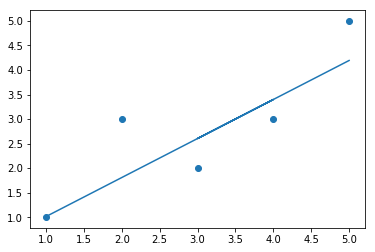

In [48]:
plt.scatter(train_x,train_y)
plt.plot(train_x,regression_line)
plt.show()

                                    2. Implementation of Batch Gradient Descent

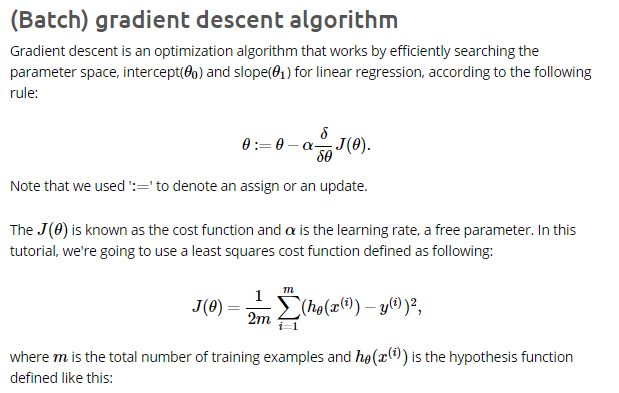

In [10]:
from IPython.display import Image
Image("BGD01.png")

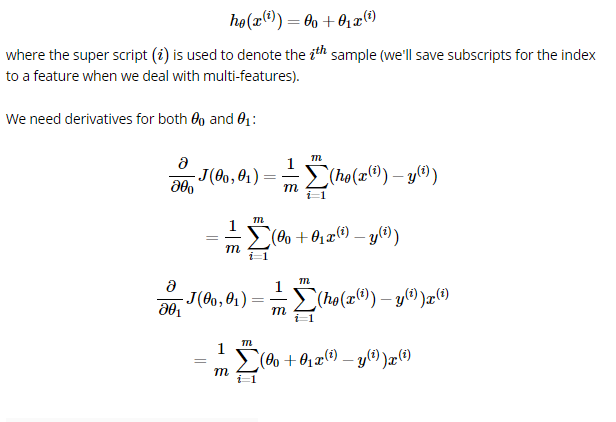

In [11]:
from IPython.display import Image
Image("BGD02.png")

Process Steps;
Iteration 1,
1. Algorithm first sets the initial B0 and B1 as 0
2. Calculates error for all the samples after taking partial derivative of cost function w.r.t B0
3. Then it updates B0 weights using the gradient descent equation
4. Same from 2 to 3 it does to calculate B1 (slope)
Iteration 2,
1. Algorithm sets the B0, B1 from the updated weights from previous iteration
2. Follow steps 2 to 4
Iteration 4...........

Note: Constant Learning rate 0.01 is maintained
B0 is Intercept, B1 is Slope

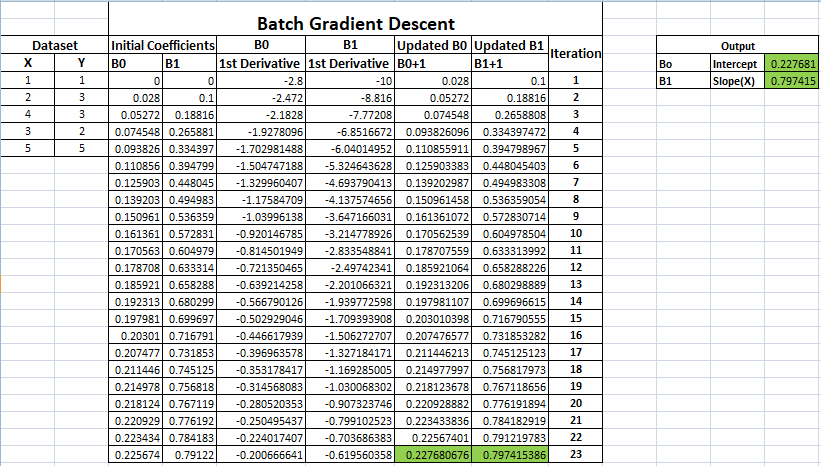

In [13]:
from IPython.display import Image
Image("Batch_GD.png")

Summary;  
                Manual(SGD)   Manual(Batch)   Python(SGD)
Slope               0.79          0.79           0.79
Intercept           0.23          0.22           0.22

Both the manual and python implementation for Batch and Stochastic method gives the same result.

In [ ]:
                                    3. Implementation of Ordinary Least Square Method

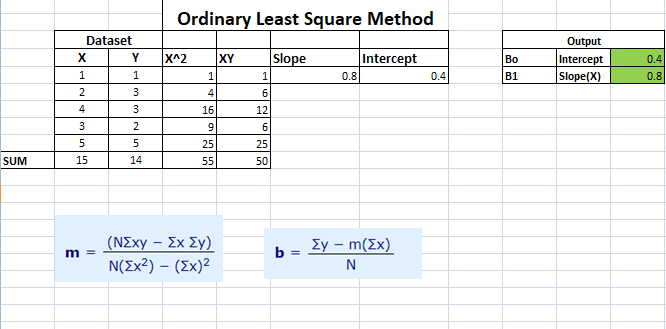

In [10]:
from IPython.display import Image
Image("OLS.png")

In [2]:
from sklearn.linear_model import LinearRegression

In [6]:
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
model.coef_

array([0.8])

In [9]:
model.intercept_

0.39999999999999947